In [2]:
import numpy as np
import pandas as pd
from google.colab import drive
drive.mount('/content/gdrive',force_remount=True)
filepath = '/content/gdrive/My Drive/tabular_playground/'
train = pd.read_csv(filepath+'train.csv')
test=pd.read_csv(filepath+'test.csv')

Mounted at /content/gdrive


In [ ]:
train.info() # train 데이터셋 정보

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300000 entries, 0 to 299999
Data columns (total 26 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   id      300000 non-null  int64  
 1   cat0    300000 non-null  object 
 2   cat1    300000 non-null  object 
 3   cat2    300000 non-null  object 
 4   cat3    300000 non-null  object 
 5   cat4    300000 non-null  object 
 6   cat5    300000 non-null  object 
 7   cat6    300000 non-null  object 
 8   cat7    300000 non-null  object 
 9   cat8    300000 non-null  object 
 10  cat9    300000 non-null  object 
 11  cont0   300000 non-null  float64
 12  cont1   300000 non-null  float64
 13  cont2   300000 non-null  float64
 14  cont3   300000 non-null  float64
 15  cont4   300000 non-null  float64
 16  cont5   300000 non-null  float64
 17  cont6   300000 non-null  float64
 18  cont7   300000 non-null  float64
 19  cont8   300000 non-null  float64
 20  cont9   300000 non-null  float64
 21  cont10  30

In [ ]:
test.info() # test 데이터셋 정보

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200000 entries, 0 to 199999
Data columns (total 25 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   id      200000 non-null  int64  
 1   cat0    200000 non-null  object 
 2   cat1    200000 non-null  object 
 3   cat2    200000 non-null  object 
 4   cat3    200000 non-null  object 
 5   cat4    200000 non-null  object 
 6   cat5    200000 non-null  object 
 7   cat6    200000 non-null  object 
 8   cat7    200000 non-null  object 
 9   cat8    200000 non-null  object 
 10  cat9    200000 non-null  object 
 11  cont0   200000 non-null  float64
 12  cont1   200000 non-null  float64
 13  cont2   200000 non-null  float64
 14  cont3   200000 non-null  float64
 15  cont4   200000 non-null  float64
 16  cont5   200000 non-null  float64
 17  cont6   200000 non-null  float64
 18  cont7   200000 non-null  float64
 19  cont8   200000 non-null  float64
 20  cont9   200000 non-null  float64
 21  cont10  20

In [3]:
cat_cols = [feature for feature in train.columns if 'cat' in feature]  #cat으로 시작하는 열 이름 모으기
num_cols=[num for num in train.columns if 'cont' in num]    #cont로 시작하는 열 이름 모으기
print(cat_cols)
print(num_cols)

['cat0', 'cat1', 'cat2', 'cat3', 'cat4', 'cat5', 'cat6', 'cat7', 'cat8', 'cat9']
['cont0', 'cont1', 'cont2', 'cont3', 'cont4', 'cont5', 'cont6', 'cont7', 'cont8', 'cont9', 'cont10', 'cont11', 'cont12', 'cont13']


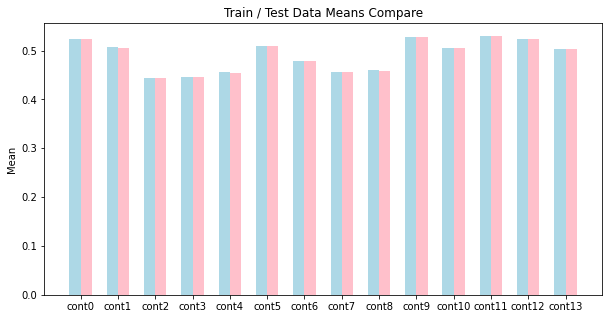

In [31]:
# 먼저 자료들의 상태를 보자. 숫자로 이루어진 것부터 확인

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

train_mean = np.mean(train[num_cols])
test_mean = np.mean(test[num_cols])

x=np.arange(len(num_cols))
fig,axes = plt.subplots(nrows=1,ncols=1,figsize=(10,5))
width=0.3
train_bar = axes.bar(x-width/2,train_mean,width,label='Train',color = 'lightblue')
test_bar = axes.bar(x+width/2,test_mean,width,label='Test',color='pink')

axes.set_ylabel('Mean')
axes.set_title('Train / Test Data Means Compare')

axes.set_xticks(x)
axes.set_xticklabels(num_cols)
plt.show()

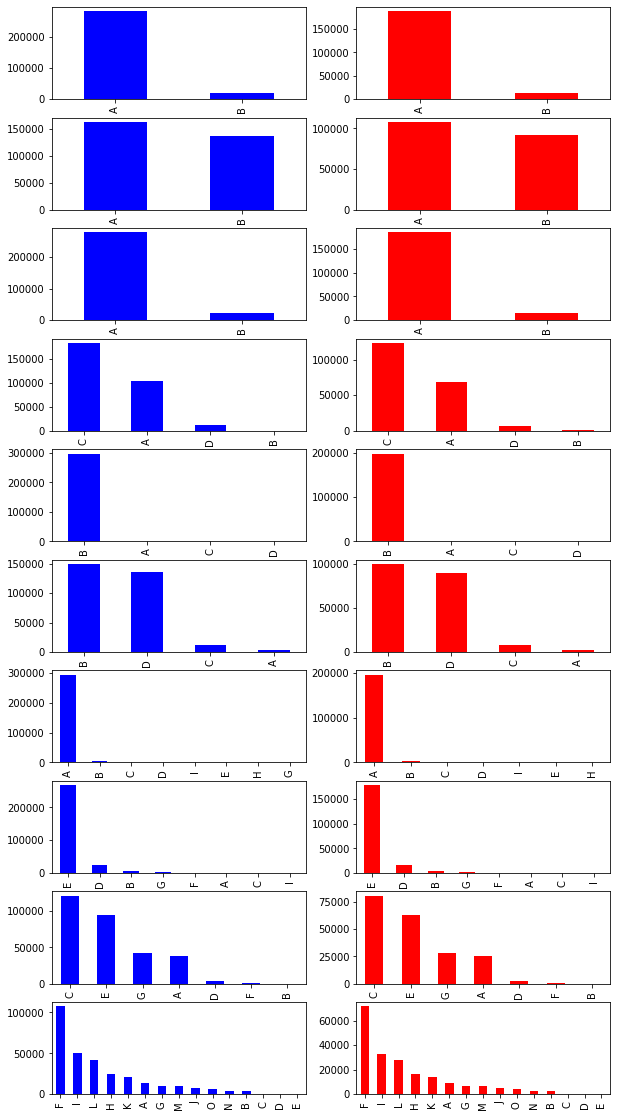

In [ ]:
# cat으로 시작하는 열들에 들어있는 알파벳 파악하기

train_cat = train[cat_cols]
test_cat=test[cat_cols]

fig,ax = plt.subplots(10,2,figsize=(10,20))
for i, col in enumerate(cat_cols):
  train_cat[col].value_counts().plot(kind='bar',ax=ax[i][0],label = col,color = 'blue')
  test_cat[col].value_counts().plot(kind='bar',ax=ax[i][1],label=col,color = 'red')

In [32]:
# cat카테고리들에 들어있는 알파벳의 범위를 알아보자.
data = pd.concat([train, test], sort=False)  #train과 test 데이터셋 합쳐서 한번에 확인
set(data['cat0']) | set(data['cat1']) |set(data['cat2']) | set(data['cat3']) | set(data['cat4']) | set(data['cat5']) | set(data['cat6']) | set(data['cat7']) | set(data['cat8'])|set(data['cat9'])

{'A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 'N', 'O'}

In [4]:
# cat에 있던 알파벳 -> 숫자로 변환
from sklearn.preprocessing import LabelEncoder
for i in cat_cols:
  le = LabelEncoder()
  train[i] = le.fit_transform(train[i])
  test[i]=le.fit_transform(test[i])

In [ ]:
train.head()

,id,cat0,cat1,cat2,cat3,cat4,cat5,cat6,cat7,cat8,cat9,cont0,cont1,cont2,cont3,cont4,cont5,cont6,cont7,cont8,cont9,cont10,cont11,cont12,cont13,target
0,1,0,1,0,0,1,3,0,4,2,8,0.923191,0.684968,0.124454,0.217886,0.281421,0.881122,0.421650,0.741413,0.895799,0.802461,0.724417,0.701915,0.877618,0.719903,6.994023
1,2,1,0,0,0,1,1,0,4,0,5,0.437627,0.014213,0.357438,0.846127,0.282354,0.440011,0.346230,0.278495,0.593413,0.546056,0.613252,0.741289,0.326679,0.808464,8.071256
2,3,0,0,0,2,1,3,0,1,2,13,0.732209,0.760122,0.454644,0.812990,0.293756,0.914155,0.369602,0.832564,0.865620,0.825251,0.264104,0.695561,0.869133,0.828352,5.760456
3,4,0,0,0,2,1,3,0,4,6,10,0.705142,0.771678,0.153735,0.732893,0.769785,0.934138,0.578930,0.407313,0.868099,0.794402,0.494269,0.698125,0.809799,0.614766,7.806457
4,6,0,1,0,0,1,1,0,4,2,5,0.486063,0.639349,0.496212,0.354186,0.279105,0.382600,0.705940,0.325193,0.440967,0.462146,0.724447,0.683073,0.343457,0.297743,6.868974


In [ ]:
test.head()

,id,cat0,cat1,cat2,cat3,cat4,cat5,cat6,cat7,cat8,cat9,cont0,cont1,cont2,cont3,cont4,cont5,cont6,cont7,cont8,cont9,cont10,cont11,cont12,cont13
0,0,0,1,0,2,1,3,0,4,4,6,0.331261,0.551131,0.486284,0.156058,0.701679,0.595507,0.286912,0.279884,0.202234,0.242654,0.285147,0.264308,0.653654,0.302448
1,5,0,1,0,2,1,3,0,4,2,11,0.402404,0.617546,0.296852,0.187440,0.277480,0.479552,0.397436,0.476742,0.857073,0.516393,0.562065,0.730542,0.318492,0.736251
2,15,0,1,0,2,1,3,0,4,2,5,0.530677,0.618126,0.760865,0.199872,0.279508,0.676395,0.695284,0.253316,0.586934,0.548555,0.836193,0.759788,0.333572,0.273905
3,16,0,0,1,0,1,3,0,4,4,5,0.439653,0.487403,0.715786,0.192808,0.479503,0.759875,0.240049,0.298074,0.442475,0.596746,0.414131,0.255382,0.589080,0.311625
4,17,0,1,0,0,1,1,0,4,4,8,0.389844,0.752760,0.315269,0.191734,0.757845,0.210232,0.329851,0.616663,0.170475,0.263235,0.710961,0.224045,0.285860,0.794931


# 일단 전체 데이터셋 돌려보기 (앙상블 4가지 모델 중 어떤게 가장 효율적?)

In [5]:
# 인코딩 시킨 데이터들을 train과 test 셋으로 다시 나눈다.
train.drop('id', axis=1, inplace=True)
test.drop('id', axis=1, inplace=True)
y_train = train['target']
X_train = train.drop('target', axis=1)
X_test = test

In [6]:
# train_test_split을 이용하여 train set에서 train, validation을 7:3비율로 나눈다.
from sklearn.model_selection import train_test_split
X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, test_size=0.3, random_state = 0,shuffle=True)

In [36]:
print("X_train = ", X_train.shape)
print("y_train = ", y_train.shape)
print("X_valid = ", X_valid.shape)
print("y_valid = ", y_valid.shape)

X_train =  (210000, 24)
y_train =  (210000,)
X_valid =  (90000, 24)
y_valid =  (90000,)


In [37]:
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor 
from sklearn.model_selection import GridSearchCV 
from sklearn.metrics import mean_squared_error
import xgboost as xgb


# 선형회귀분석 
lr_reg=LinearRegression()
lr_reg.fit(X_train,y_train)
lr_valid_pred=lr_reg.predict(X_valid)

print("Validation accuracy : "+str(mean_squared_error(y_valid,lr_valid_pred,squared=False)))

Validation accuracy : 0.868852381353615


In [ ]:
sub = pd.read_csv(filepath+'sample_submission.csv')
y_pred = model.predict(X_test)
sub['target'] = y_pred
sub.to_csv(filepath+'KNN_feb.csv', index =False)
sub.head()

In [ ]:
#XGBoost 모델
model = xgb.XGBRegressor(objective = 'reg:squarederror')
model.fit(X_train, y_train)
y_train_predict = model.predict(X_train)
y_valid_predict = model.predict(X_valid)

print("Validation accuracy : "+ str(mean_squared_error(y_valid, y_valid_predict, squared=False)))

Validation accuracy : 0.853603839588347


In [ ]:
sub = pd.read_csv(filepath+'sample_submission.csv')
y_pred = model.predict(X_test)
sub['target'] = y_pred
sub.to_csv(filepath+'KNN_feb.csv', index =False)
sub.head()

In [ ]:
# 랜덤포레스트 모델
r_freg = RandomForestRegressor(n_estimators=10,random_state=42) # 초기치를 10으로 설정
r_freg.fit(X_train,y_train)
r_valid_pred=r_freg.predict(X_valid)

print("Validation accuracy : "+ str(mean_squared_error(y_valid, r_valid_pred, squared=False)))

Validation accuracy : 0.8996459302611336


In [ ]:
sub = pd.read_csv(filepath+'sample_submission.csv')
y_pred = r_freg.predict(X_test)
sub['target'] = y_pred
sub.to_csv(filepath+'RandomForest_feb.csv', index =False)
sub.head()

In [ ]:
kn_reg=KNeighborsRegressor()
kn_reg.fit(X_train,y_train)
kn_valid_pred=kn_reg.predict(X_valid)
print("Validation accuracy : "+str(mean_squared_error(y_valid,kn_valid_pred,squared=False)))

Validation accuracy : 0.9443564726456494


In [ ]:
sub = pd.read_csv(filepath+'sample_submission.csv')
kn_pred = kn_freg.predict(X_test)
sub['target'] = kn_pred
sub.to_csv(filepath+'KNN_feb.csv', index =False)
sub.head()

# 가장 성능이 좋았던 랜덤포레스트와 Kneighbor회귀분석을 이용

In [5]:
train = pd.read_csv(filepath+'train.csv')
test=pd.read_csv(filepath+'test.csv')

for i in cat_cols:
  le = LabelEncoder()
  train[i] = le.fit_transform(train[i])
  test[i]=le.fit_transform(test[i])

NameError: ignored

In [ ]:
# one-hot vs labelEncoder
# get_dummies이용해서 one-hot 인코딩 한번에 하기

column_B=['cat0', 'cat1', 'cat2', 'cat3', 'cat4', 'cat5', 'cat6', 'cat7', 'cat8', 'cat9']
train=pd.get_dummies(train,columns=column_B)
test=pd.get_dummies(test,columns=column_B)

In [ ]:
train.head()

,id,cont0,cont1,cont2,cont3,cont4,cont5,cont6,cont7,cont8,cont9,cont10,cont11,cont12,cont13,target,cat0_0,cat0_1,cat1_0,cat1_1,cat2_0,cat2_1,cat3_0,cat3_1,cat3_2,cat3_3,cat4_0,cat4_1,cat4_2,cat4_3,cat5_0,cat5_1,cat5_2,cat5_3,cat6_0,cat6_1,cat6_2,cat6_3,cat6_4,cat6_5,cat6_6,cat6_7,cat7_0,cat7_1,cat7_2,cat7_3,cat7_4,cat7_5,cat7_6,cat7_7,cat8_0,cat8_1,cat8_2,cat8_3,cat8_4,cat8_5,cat8_6,cat9_0,cat9_1,cat9_2,cat9_3,cat9_4,cat9_5,cat9_6,cat9_7,cat9_8,cat9_9,cat9_10,cat9_11,cat9_12,cat9_13,cat9_14
0,1,0.923191,0.684968,0.124454,0.217886,0.281421,0.881122,0.421650,0.741413,0.895799,0.802461,0.724417,0.701915,0.877618,0.719903,6.994023,1,0,0,1,1,0,1,0,0,0,0,1,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
1,2,0.437627,0.014213,0.357438,0.846127,0.282354,0.440011,0.346230,0.278495,0.593413,0.546056,0.613252,0.741289,0.326679,0.808464,8.071256,0,1,1,0,1,0,1,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
2,3,0.732209,0.760122,0.454644,0.812990,0.293756,0.914155,0.369602,0.832564,0.865620,0.825251,0.264104,0.695561,0.869133,0.828352,5.760456,1,0,1,0,1,0,0,0,1,0,0,1,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
3,4,0.705142,0.771678,0.153735,0.732893,0.769785,0.934138,0.578930,0.407313,0.868099,0.794402,0.494269,0.698125,0.809799,0.614766,7.806457,1,0,1,0,1,0,0,0,1,0,0,1,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
4,6,0.486063,0.639349,0.496212,0.354186,0.279105,0.382600,0.705940,0.325193,0.440967,0.462146,0.724447,0.683073,0.343457,0.297743,6.868974,1,0,0,1,1,0,1,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0


In [ ]:
# get_dummies 이용해서 one-hot 인코딩 한번에 하기
column_B=['cat0', 'cat1', 'cat2', 'cat3', 'cat4', 'cat5', 'cat6', 'cat7', 'cat8', 'cat9']
train=pd.get_dummies(train,columns=column_B)
test=pd.get_dummies(test,columns=column_B)

In [ ]:
train.head()

,target,cat0_0,cat0_1,cat1_0,cat1_1,cat2_0,cat2_1,cat3_0,cat3_1,cat3_2,cat3_3,cat4_0,cat4_1,cat4_2,cat4_3,cat5_0,cat5_1,cat5_2,cat5_3,cat6_0,cat6_1,cat6_2,cat6_3,cat6_4,cat6_5,cat6_6,cat6_7,cat7_0,cat7_1,cat7_2,cat7_3,cat7_4,cat7_5,cat7_6,cat7_7,cat8_0,cat8_1,cat8_2,cat8_3,cat8_4,cat8_5,cat8_6,cat9_0,cat9_1,cat9_2,cat9_3,cat9_4,cat9_5,cat9_6,cat9_7,cat9_8,cat9_9,cat9_10,cat9_11,cat9_12,cat9_13,cat9_14
0,6.994023,1,0,0,1,1,0,1,0,0,0,0,1,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
1,8.071256,0,1,1,0,1,0,1,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
2,5.760456,1,0,1,0,1,0,0,0,1,0,0,1,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
3,7.806457,1,0,1,0,1,0,0,0,1,0,0,1,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
4,6.868974,1,0,0,1,1,0,1,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0


In [ ]:
train.drop('id', axis=1, inplace=True)
test.drop('id', axis=1, inplace=True)
y_train = train['target']
X_train = train.drop('target', axis=1)
X_test = test
X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, test_size=0.3, random_state = 0,shuffle=True)
print("X_train = ", X_train.shape)
print("y_train = ", y_train.shape)
print("X_valid = ", X_valid.shape)
print("y_valid = ", y_valid.shape)

X_train =  (210000, 70)
y_train =  (210000,)
X_valid =  (90000, 70)
y_valid =  (90000,)


In [ ]:
r_freg = RandomForestRegressor(n_estimators=10,random_state=42) # 초기치를 10으로 설정
r_freg.fit(X_train,y_train)
r_valid_pred=r_freg.predict(X_valid)

print("Validation accuracy : "+ str(mean_squared_error(y_valid, r_valid_pred, squared=False)))
#정확도 0.2%정도 떨어짐 (큰 변화는 없음)

Validation accuracy : 0.8970545124033837


In [47]:
# 15분 이상이 걸림 -> 비효율적
kn_reg=KNeighborsRegressor()
kn_reg.fit(X_train,y_train)
kn_valid_pred=kn_reg.predict(X_valid)
print("Validation accuracy : "+str(mean_squared_error(y_valid,kn_valid_pred,squared=False)))

Validation accuracy : 0.9443564726456494


**one-hot인코딩 필요 없음**

In [ ]:
#다시 파일을 받음 (원상복귀)
train = pd.read_csv(filepath+'train.csv')
test=pd.read_csv(filepath+'test.csv')
from sklearn.preprocessing import LabelEncoder
for i in cat_cols:
  le = LabelEncoder()
  train[i] = le.fit_transform(train[i])
  test[i]=le.fit_transform(test[i])

In [ ]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor 
from sklearn.metrics import mean_squared_error

# GridSearchCV를 이용해서 더 정확도를 높여보자.

In [ ]:
from sklearn.model_selection import GridSearchCV 
params={'n_estimators' : [10,20],'max_depth' : [6,8],'min_samples_leaf':[10,20,30]} 
# gridsearch 한 번 쓰는데, 컴퓨터에서 보통 20~30분씩 걸렸다. 

r_model = RandomForestRegressor(random_state=42)
grid_cv = GridSearchCV(r_model,param_grid=params, scoring="neg_mean_squared_error")
grid_cv.fit(X_train,y_train)

print(grid_cv.best_params_)
print(grid_cv.best_score_)

In [ ]:
r_freg = RandomForestRegressor(n_estimators=10,random_state=42) # 초기치를 10으로 설정
r_freg.fit(X_train,y_train)
r_valid_pred=r_freg.predict(X_valid)

print("Validation accuracy : "+ str(mean_squared_error(y_valid, r_valid_pred, squared=False)))

In [ ]:
#30분 이상 소요
from sklearn.model_selection import GridSearchCV 
from sklearn.metrics import mean_squared_error
knn= KNeighborsRegressor()
param_grid=[{'n_neighbors': [30,50,70]}]
gs=GridSearchCV(estimator=knn, param_grid = param_grid, scoring='neg_mean_squared_error')
gs.fit(X_train,y_train)

print('best parameter : '+str(gs.best_params_))
print('best parameter score  : '+str(gs.best_score_))

In [14]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error
kn_reg=KNeighborsRegressor(n_neighbors=150)
kn_reg.fit(X_train,y_train)
kn_valid_pred=kn_reg.predict(X_valid)
print("Validation accuracy : "+str(mean_squared_error(y_valid,kn_valid_pred,squared=False)))

Validation accuracy : 0.8695552239009704


**한번 돌리는데, 기본 20~30분 소요됨 -> 비효율적 방법**

In [12]:
sub = pd.read_csv(filepath+'sample_submission.csv')
kn_pred = kn_reg.predict(X_test)
sub['target'] = kn_pred
sub.to_csv(filepath+'1.csv', index =False)
sub.head()

,id,target
0,0,7.549699
1,5,8.218891
2,15,7.795485
3,16,8.441844
4,17,7.435290
